# Hare and Lynx

[Snowshoe hare](https://en.wikipedia.org/wiki/Snowshoe_hare) (*Lepus americanus*) are the primary food for the [Canadian lynx](https://en.wikipedia.org/wiki/Canada_lynx) (*Lynx canadensis*) in the Northern boreal forests of North America. When hare are abundant, Lynx will eat about two every three days, almost to the exclusion of any other food. As a consequence, the population dynamics of the two species are closely linked. 

It has been known for over a century that the populations of the two species vary dramatically in cycles of 8 to 11 year duration. This chart, for example, shows pelt-trading data taken from the Hudson's Bay Company (from MacLulich, 1937.  See important notes on this data in [Stenseth, 1997](http://www.pnas.org/content/94/10/5147.full))

![Hare and Lynx Population](MainLynx.jpg)

The actual cause of the cycling is, apparently, still a matter of scientific inquiry. Hypotheses include the inherent instability of the preditor-prey dynamics, the dynamics of a more complex food web, and the role of climate (see [Zhang, 2007](http://www.int-res.com/articles/feature/c034p083.pdf)).

This notebook presents an analysis of a preditor-prey model of the hare-lynx dynamics that was described by Murray.

## Population Dynamics

### Model Equations

The model equatons describe the time rate of change of the population densities of hare ($H$) and lynx ($L$). Each is the difference between the birth and death rate. The death rate of hare is coupled to the population density of lynx. The birth rate of lynx is a simple multiple of the death rate of hare.

$$\begin{align*}\frac{dH}{dt} & = \underbrace{rH\left(1-\frac{H}{k}\right)}_{Hare Birth Rate}-\underbrace{\frac{aHL}{c+H}}_{Hare Death Rate}\\
\frac{dL}{dt} & = \underbrace{a\frac{bHL}{c+H}}_{Lynx Birth Rate}-\underbrace{dL}_{Lynx Death Rate}
\end{align*}$$



### Parameter Values

$$\begin{align*}
\frac{dH}{dt} & = r H \left(1-\frac{H}{k}\right) - \frac{a H L}{c + H} \\
\frac{dL}{dt} & = b\frac{a H L}{c + H} - dL
\end{align*}$$

| Parameter | Symbol | Value |
| - | :----: | :---: |
| Lynx/Hare Predation Rate | $a$ | 3.2 |
| Lynx/Hare Conversion | $b$ | 0.6 |
| Lynx/Hare Michaelis Constant| $c$ | 50 |
| Lynx Death Rate | $d$ | 0.56 |
| Hare Carrying Capacity| $k$ | 125 |
| Hare Reproduction Rate | $r$ | 1.6 |

### Nullclines

Nullclines are the points in the phase plane where one or the other of the derivatives is equal to zero. The nullclines for the Hare and Lynx example are, for $\frac{dH}{dt} = 0$, 

$$\frac{dH}{dt} = 0 \implies \begin{cases}
\begin{align*}
H^* & = 0 \\
\\
L^* & = \frac{r}{a}\left(c+H\right)\left(1-\frac{H}{k}\right)
\end{align*}
\end{cases}$$

and for $\frac{dL}{dt} = 0$,

$$\frac{dL}{dt} = 0 \implies \begin{cases}
\begin{align*}
L^* & = 0 \\
\\
H^* & = \frac{c d}{a b - d}
\end{align*}
\end{cases}$$

## Initialization

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

## Differential Equations

`deriv` is a function that returns values for the derivatives of $H$ and $L$ in the form of a two element list. The first argument is the current state, also a two element list, followed by the current time $t$, and values for all model parameters.

In [8]:
# differential equations
def deriv(X,t,a,b,c,d,k,r):
    H,L = X
    Hdot =  r*H*(1-H/k) - a*H*L/(c+H)
    Ldot = b*a*H*L/(c+H) - d*L
    return [Hdot,Ldot]

## Visualization Function

The visualization function for this example accepts a list of time values, values of $H$ and $L$, and model parameters. The model parameters are needed to plot nullclines and steady states on the phase plane.

In [37]:
# visualization
def HLPlot(t,H,L,a,b,c,d,k,r):
    # time axis
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.plot(t,H)
    plt.plot(t,L)
    plt.xlabel('Time [years]')
    plt.ylabel('Population Density')
    plt.legend(['Hare','Lynx'],loc='upper left')
    
    # phase plane
    plt.subplot(122)
    plt.plot(H,L)
    plt.xlim(0,130)
    plt.ylim(0,130)
    plt.title('Hare/Lynx Phase Plane')
    plt.xlabel('Hare')
    plt.ylabel('Lynx')
    
    # nullcline dH/dt = 0
    Hp = np.linspace(0,k)
    Lp = r*(1-Hp/k)*(c+Hp)/a
    plt.plot(Hp,Lp)
    
    # nullcline dL/dt = 0
    Hd = c*d/(a*b-d)
    plt.plot([Hd,Hd],plt.ylim())
    
    # steady states
    plt.plot(0,0,'r.',ms = 20)
    plt.plot(k,0,'r.',ms = 20)
    Hss = c*d/(a*b-d)
    Lss = r*(1-Hss/k)*(c+Hss)/a
    plt.plot(Hss,Lss,'r.',ms=20)

## ODE Solver

An additional function is created to encapsulate the entire process of solving the model and displaying the solution. The function takes arguments specifing the initial values of $H$ and $L$, and a value of the parameter $a$.  These argument 

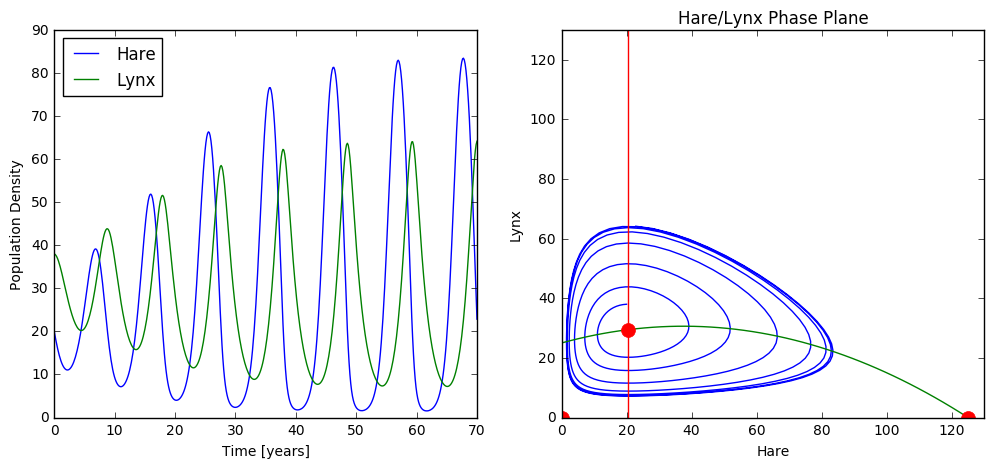

In [38]:
# default parameter values
a = 3.2
b = 0.6
c = 50
d = 0.56
k = 125
r = 1.6

# perform simulation
t = np.linspace(0,70,500)

def LynxHare(H=20,L=20,a=a):
    IC = [H,L]
    sol = odeint(deriv,IC,t,args=(a,b,c,d,k,r))
    HLPlot(t,sol[:,0],sol[:,1],a,b,c,d,k,r)

from ipywidgets import interact
interact(LynxHare, H = (0,80,1), L =(0,80,1), a=(1.0,4.0,0.01));

## Suggested Exercise

Explore the impact of the parameter $a$ on the nature of the solution. $a$ is proporational to the success of the Lynx hunting the Hare.  What happens when the value is low?  high?  Can you see the transitions from conditions when the Lynx done't survive, the emergence of a stable coexistence steady-state, and finally the emergence of a stable limit cycle?